
<h1>Задание 1</h1>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


df = pd.read_csv('shopping_trends.csv')
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [171]:
df.shape

(3900, 19)

In [173]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [48]:
#найдите самый популярный товар - Blouse
df.describe(include=[object])

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [50]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [54]:
df['Size'].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

In [75]:
df['Customer ID'].nunique()

3900

In [175]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [177]:
df.duplicated().sum()

0

# Задание 1.1

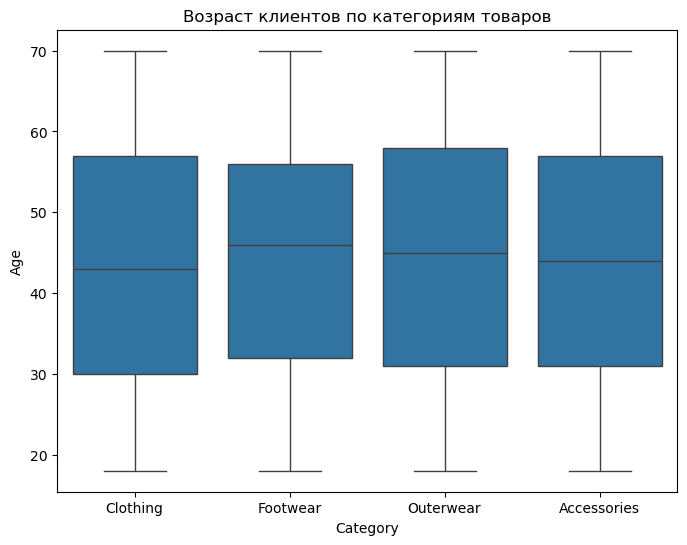

ANOVA test для возраста и категории: p-value = 0.7562


In [214]:
# 1. Возраст клиентов может влиять на выбор категории товара 
# (например, молодежь может чаще покупать одежду, а старшие люди — товары для дома).
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Category", y="Age")
plt.title("Возраст клиентов по категориям товаров")
plt.show()

# Анализ ANOVA
from scipy.stats import f_oneway
categories = df["Category"].unique()
age_groups = [df.loc[df["Category"] == cat, "Age"] for cat in categories]
anova_result = f_oneway(*age_groups)
print(f"ANOVA test для возраста и категории: p-value = {anova_result.pvalue:.4f}")


In [66]:
# 2. Пол и цвет товара: предпочтения по цвету товаров могут 
#зависеть от пола клиента (например, женщины могут чаще выбирать яркие цвета)

gender_color_table = pd.crosstab(df["Gender"], df["Color"])
chi2, p, dof, expected = chi2_contingency(gender_color_table)
print(f"Chi-squared test для пола и цвета: p-value = {p:.4f}")

Chi-squared test для пола и цвета: p-value = 0.9717


In [68]:
# 3. Рейтинг и сумма покупки: 
#высокий рейтинг зависит от суммы купленных товаров

corr, p_value = spearmanr(df["Review Rating"], df["Purchase Amount (USD)"])
print(f"Корреляция Спирмена между рейтингом и покупками: коэффициент = {corr:.4f}, p-value = {p_value:.4f}")

Корреляция Спирмена между рейтингом и покупками: коэффициент = 0.0304, p-value = 0.0578


In [70]:
# 4.  Рейтинг и предыдущие покупки: 
#высокий рейтинг зависит от количества предыдущих покупок

corr, p_value = spearmanr(df["Review Rating"], df["Previous Purchases"])
print(f"Корреляция Спирмена между рейтингом и покупками: коэффициент = {corr:.4f}, p-value = {p_value:.4f}")

Корреляция Спирмена между рейтингом и покупками: коэффициент = 0.0044, p-value = 0.7817


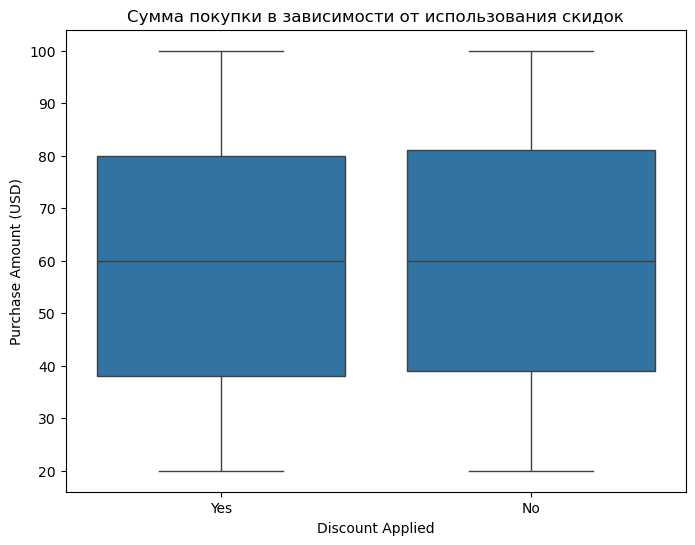

ANOVA test для скидок и суммы покупки: p-value = 0.2665


In [52]:
# 5. Применение скидок и сумма покупки: использование скидок может 
#быть связано с большими суммами покупок.

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Discount Applied", y="Purchase Amount (USD)")
plt.title("Сумма покупки в зависимости от использования скидок")
plt.show()

discount_groups = [df.loc[df["Discount Applied"] == val, "Purchase Amount (USD)"] for val in df["Discount Applied"].unique()]
anova_result = f_oneway(*discount_groups)
print(f"ANOVA test для скидок и суммы покупки: p-value = {anova_result.pvalue:.4f}")

<h2>Задание 1.2</h2>

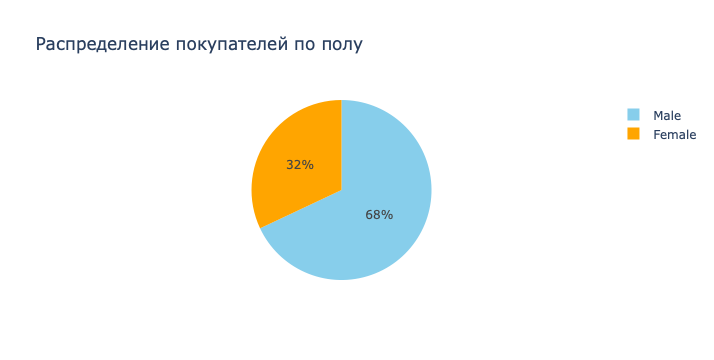

In [77]:
import plotly.express as px

fig = px.pie(df, names='Gender', title='Распределение покупателей по полу', color_discrete_sequence=['skyblue', 'orange'])
fig.show()

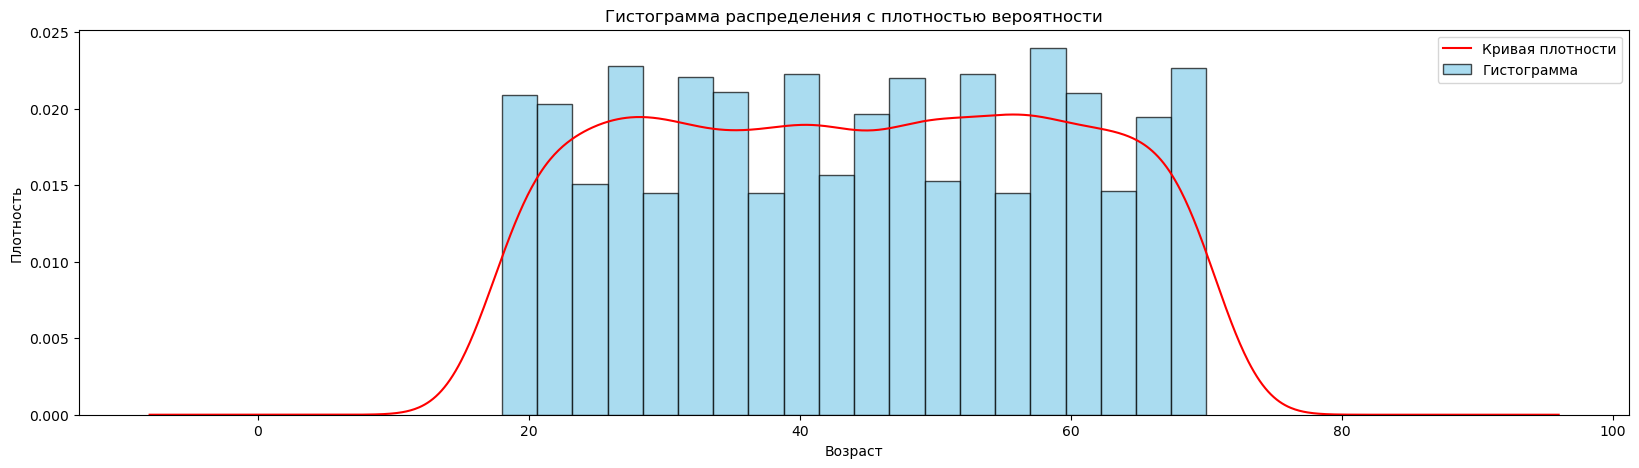

In [189]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 20, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Возраст')
ax.set_ylabel('Плотность')
ax.set_title('Гистограмма распределения с плотностью вероятности')
ax.legend(['Кривая плотности', 'Гистограмма'])
plt.show()

In [125]:
most_frequent = df.groupby(['Gender', 'Age']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
most_frequent

,Gender,Age,Count
89,Male,54,67
76,Male,41,67
60,Male,25,64
84,Male,49,64
104,Male,69,63
...,...,...,...
42,Female,60,18
41,Female,59,17
36,Female,54,16
49,Female,67,14


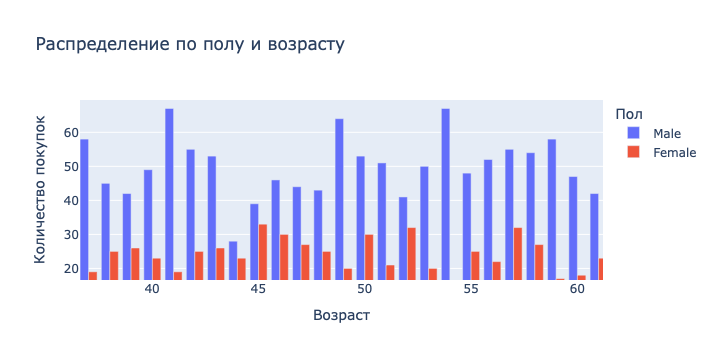

In [280]:
fig = px.bar(most_frequent, x="Age", y="Count", color="Gender", barmode="group",
             labels={"Count": "Количество покупок", "Age": "Возраст", "Gender": "Пол"},
             title="Распределение по полу и возрасту")

fig.show()

Мужчины в возрасте 41 и 54 года покупают чаще всего

In [123]:
most_frequent.head(3)

,Gender,Age,Count
89,Male,54,67
76,Male,41,67
60,Male,25,64


In [135]:
highest_spenders = df.groupby(['Gender', 'Age'])['Purchase Amount (USD)'].sum().reset_index().sort_values(by='Purchase Amount (USD)', ascending=False)
highest_spenders

,Gender,Age,Purchase Amount (USD)
89,Male,54,4329
84,Male,49,4141
76,Male,41,4025
60,Male,25,4016
104,Male,69,3888
...,...,...,...
41,Female,59,982
42,Female,60,981
36,Female,54,953
2,Female,20,747


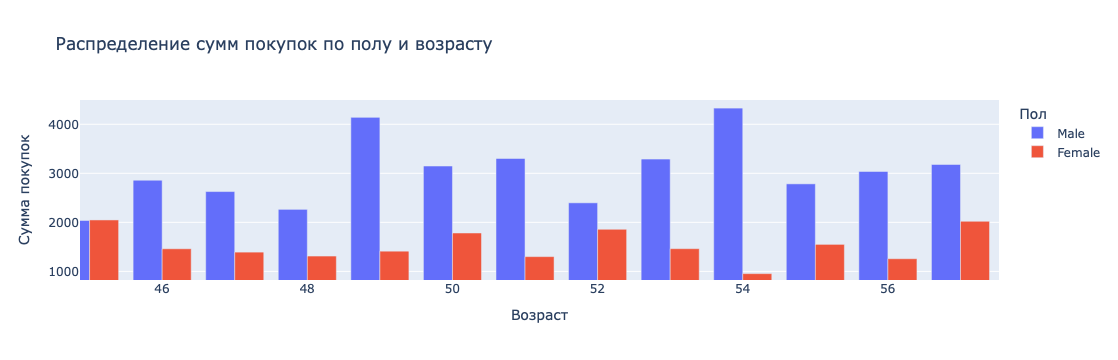

In [145]:
fig = px.bar(highest_spenders, x="Age", y="Purchase Amount (USD)", color="Gender", barmode="group",
             labels={"Purchase Amount (USD)": "Сумма покупок", "Age": "Возраст", "Gender": "Пол"},
             title="Распределение сумм покупок по полу и возрасту")

fig.show()

Мужчины в возрасте 54 года совершили покупки на большую сумму

In [147]:
most_expensive = df.loc[df['Purchase Amount (USD)'].idxmax()]
most_expensive

Customer ID                            43
Age                                    20
Gender                               Male
Item Purchased                       Coat
Category                        Outerwear
Purchase Amount (USD)                 100
Location                        Tennessee
Size                                    M
Color                               Beige
Season                             Spring
Review Rating                         4.1
Subscription Status                   Yes
Payment Method              Bank Transfer
Shipping Type               Free Shipping
Discount Applied                      Yes
Promo Code Used                       Yes
Previous Purchases                     15
Preferred Payment Method           PayPal
Frequency of Purchases           Annually
Name: 42, dtype: object

Самый дорог товар купил мужчина в возрасте 20 лет

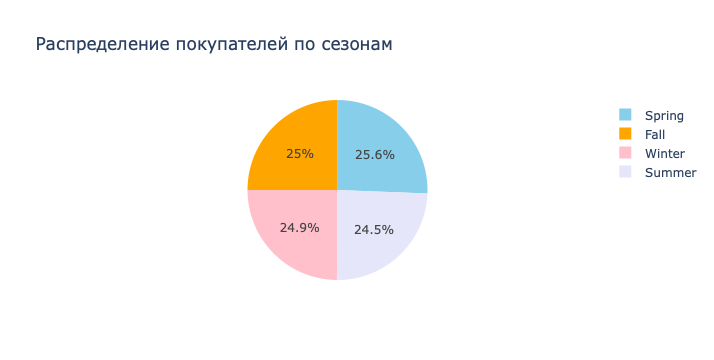

In [146]:
seasonal_counts = df['Season'].value_counts().reset_index()
seasonal_counts.columns = ['Season', 'Count'] 
fig = px.pie(seasonal_counts, names='Season', values='Count', title='Распределение покупателей по сезонам', color_discrete_sequence=['skyblue', 'orange', 'pink', 'lavender'])
fig.show()

In [195]:
grouped = df.groupby(["Season", "Color"])["Customer ID"].count().reset_index()
grouped.rename(columns={"Customer ID": "QTY"}, inplace=True)
grouped

,Season,Color,QTY
0,Fall,Beige,34
1,Fall,Black,42
2,Fall,Blue,32
3,Fall,Brown,35
4,Fall,Charcoal,32
...,...,...,...
95,Winter,Teal,37
96,Winter,Turquoise,41
97,Winter,Violet,37
98,Winter,White,36


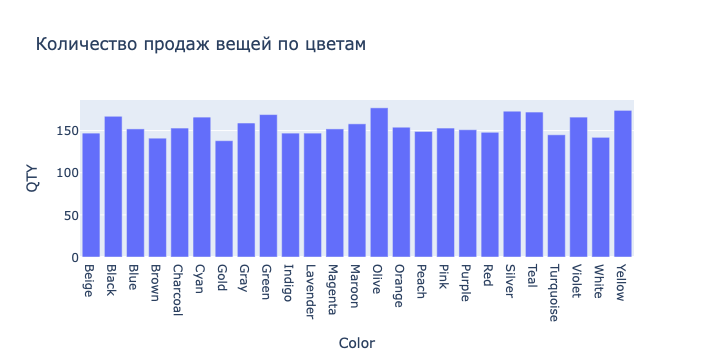

In [197]:
gcqty = df.groupby("Color")["Customer ID"].count().reset_index()
gcqty.rename(columns={"Customer ID": "QTY"}, inplace=True)
fig = px.bar(gcqty, x='Color', y='QTY', title = "Количество продаж вещей по цветам")
fig.show()
#большее купленное количество вещей оливкового цвета

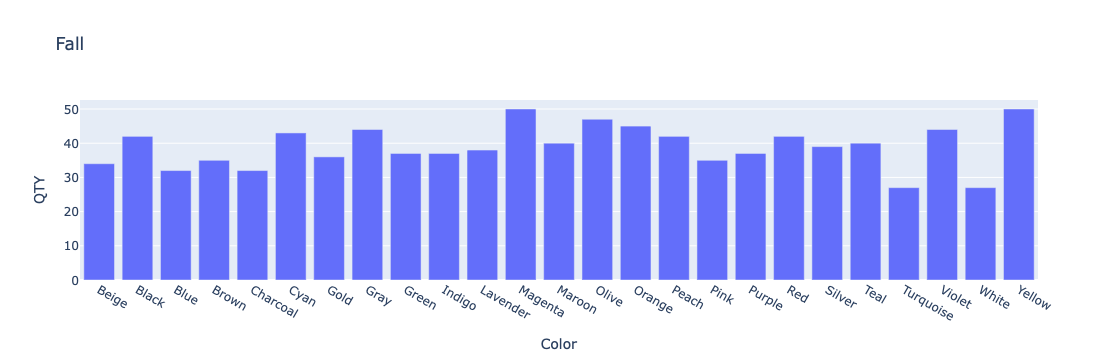

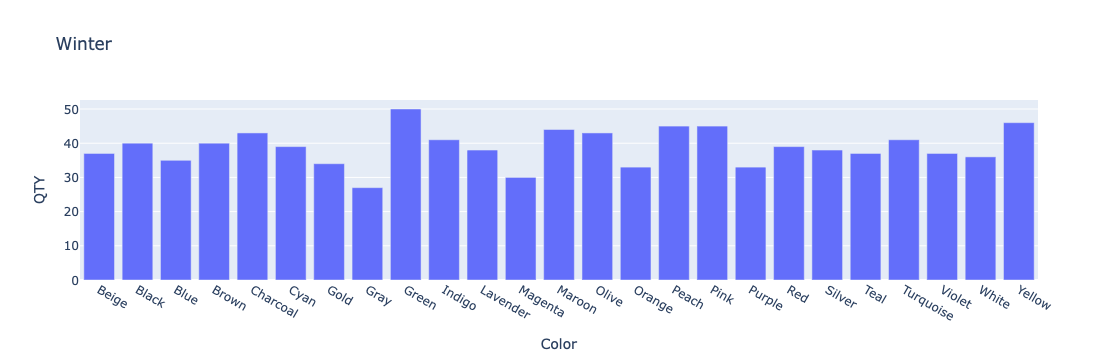

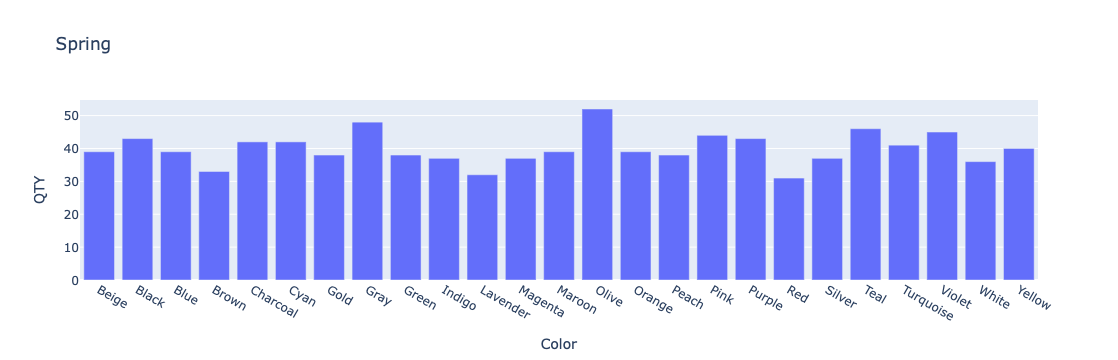

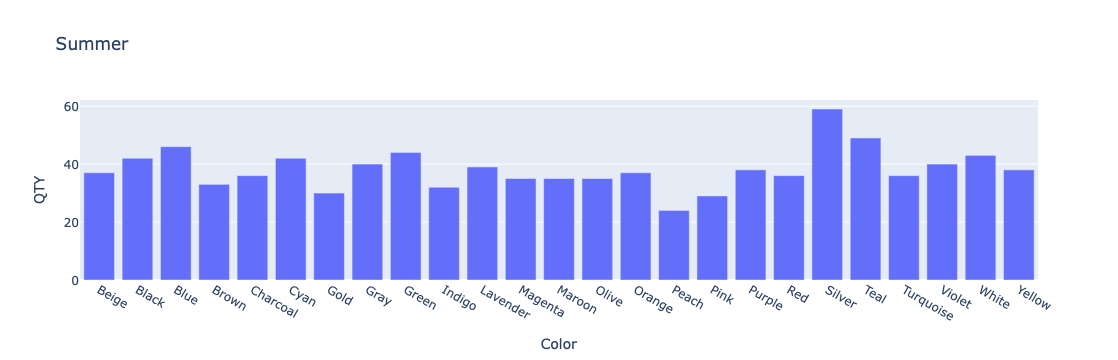

In [211]:
season_figs=[]
fall=grouped.query('Season == "Fall"')
winter=grouped.query('Season == "Winter"')
spring=grouped.query('Season == "Spring"')
summer=grouped.query('Season == "Summer"')

fig=px.bar(fall, x='Color', y='QTY', title = 'Fall')
season_figs.append(fig)
fig=px.bar(winter, x='Color', y='QTY', title = 'Winter')
season_figs.append(fig)
fig=px.bar(spring, x='Color', y='QTY', title = 'Spring')
season_figs.append(fig)
fig=px.bar(summer, x='Color', y='QTY', title = 'Summer')
season_figs.append(fig)


for fig in season_figs:
    fig.show()

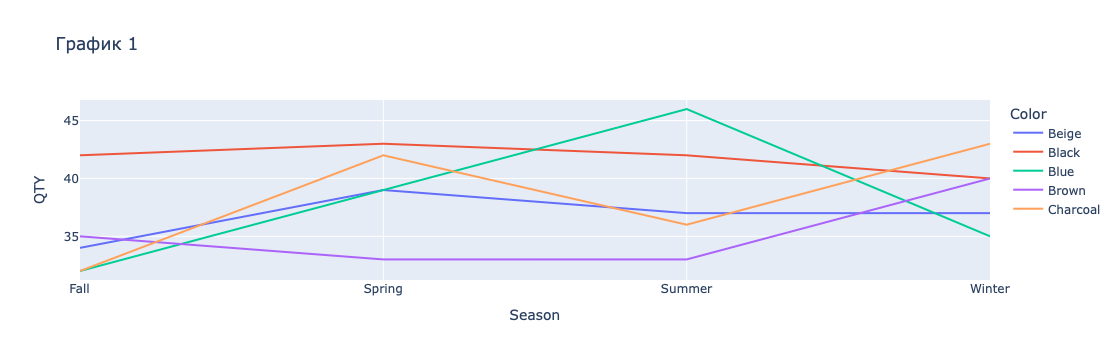

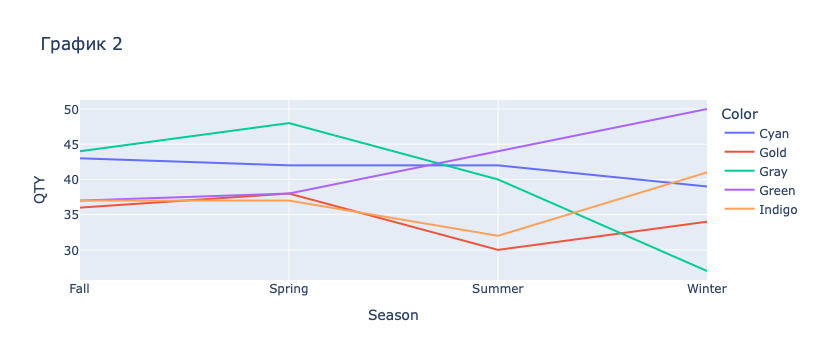

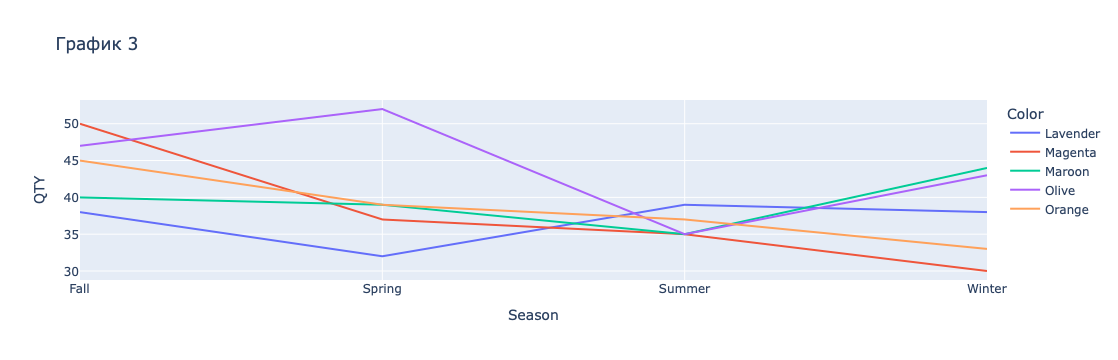

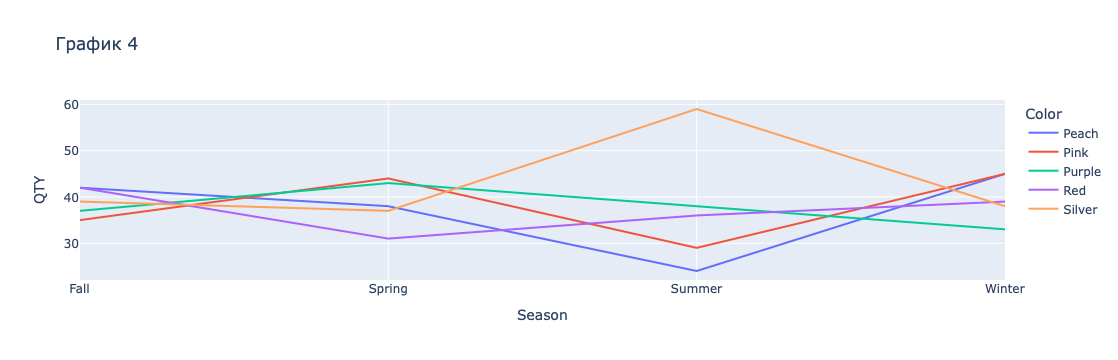

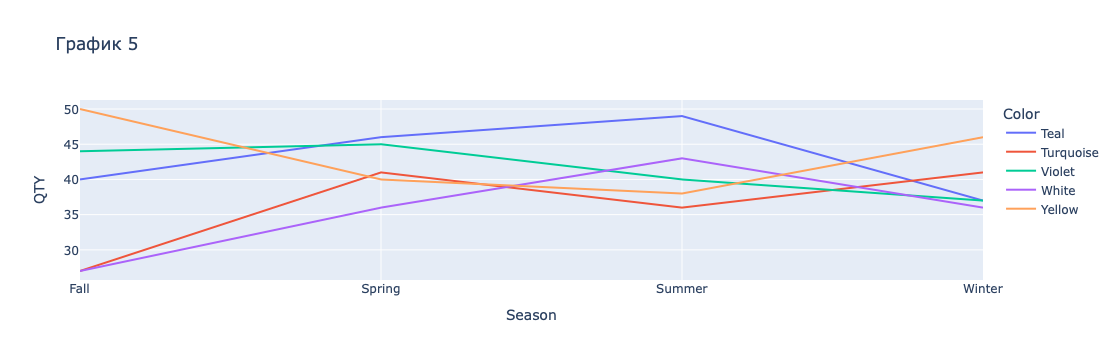

In [199]:
#Покупки вещей определенных цветов по сезонам
unique_colors = grouped['Color'].unique()
color_groups = [unique_colors[i:i + 5] for i in range(0, len(unique_colors), 5)]

figs = []
for i, colors in enumerate(color_groups):
    subset = grouped[grouped['Color'].isin(colors)]
    fig = px.line(subset, x="Season", y="QTY", color='Color',
                  title=f'График {i+1}')
    figs.append(fig)

for fig in figs:
    fig.show()

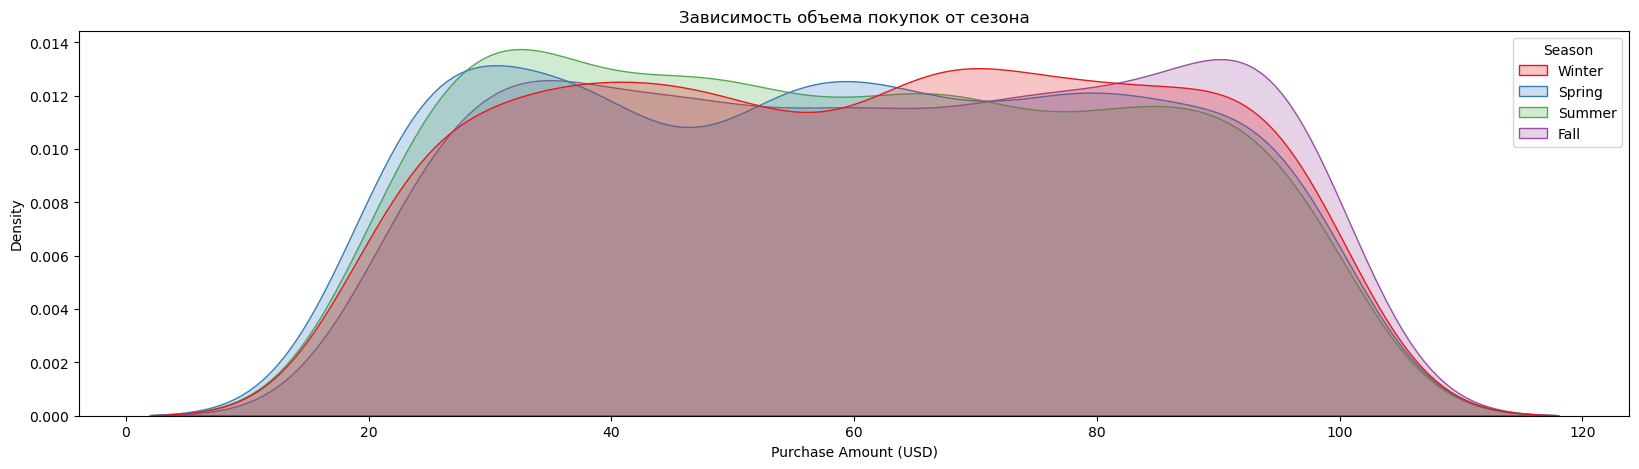

In [257]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data = df, x = 'Purchase Amount (USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('Зависимость объема покупок от сезона')
plt.xlabel('Purchase Amount (USD)')
plt.show()

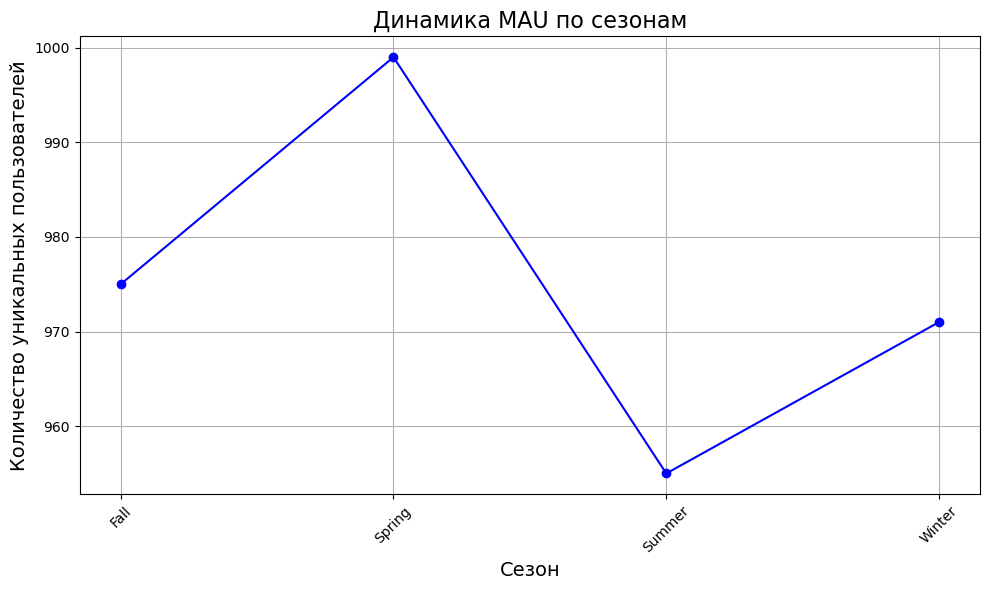

In [259]:
seasonal_mau = df.groupby('Season')['Customer ID'].nunique()

# Построение графика динамики MAU по сезонам
plt.figure(figsize=(10, 6))
plt.plot(seasonal_mau.index, seasonal_mau.values, marker='o', linestyle='-', color='b')
plt.title('Динамика MAU по сезонам', fontsize=16)
plt.xlabel('Сезон', fontsize=14)
plt.ylabel('Количество уникальных пользователей', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [261]:
seasonal_mau

Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64

In [269]:
from collections import Counter
import string
all_items = ''.join(df['Item Purchased'].str.lower()) 
all_items = ''.join(c for c in all_items if c in string.ascii_lowercase)
letter_counts = Counter(all_items)
most_common_letter, count = letter_counts.most_common(1)[0]
print(f'Самая популярная буква: "{most_common_letter}" с частотой {count}')

Самая популярная буква: "s" с частотой 4063


<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [6]:
df_drinks = pd.read_csv('drinks.csv')
df_drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [88]:
df_drinks.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [90]:
df_drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [92]:
df_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


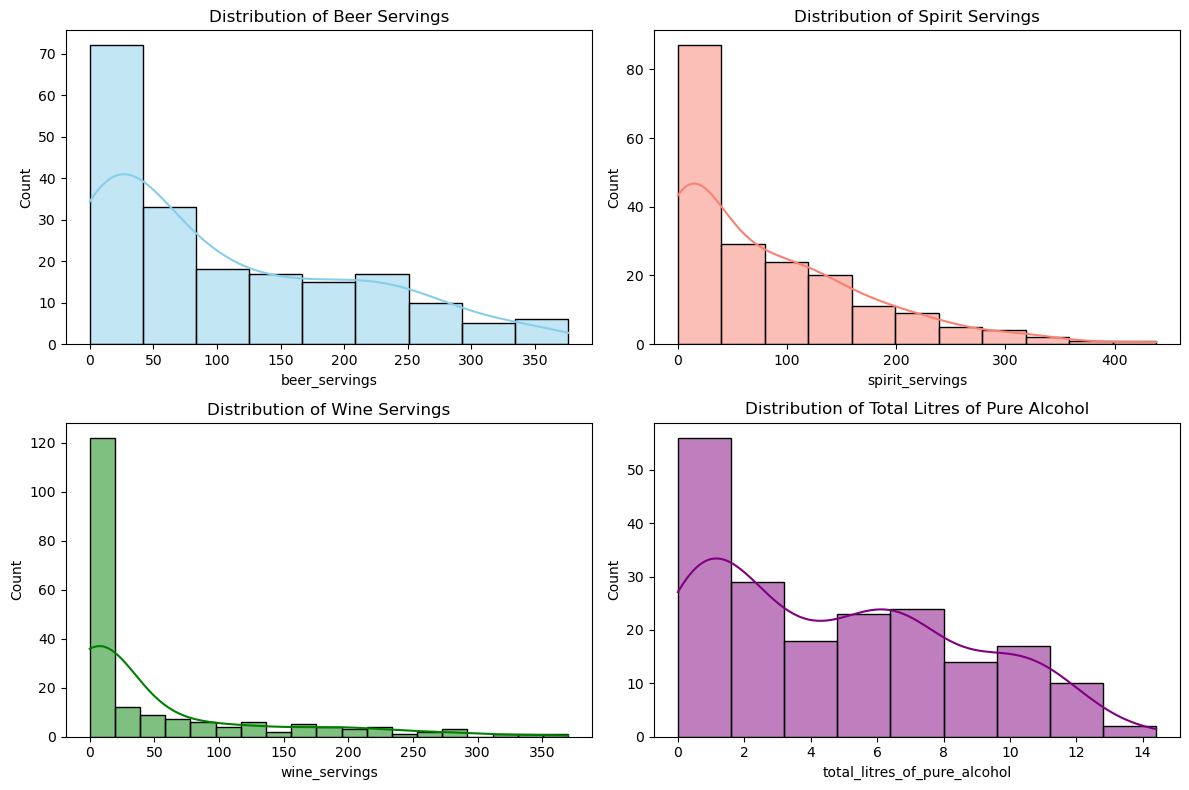

In [96]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df_drinks['beer_servings'], kde=True, color='skyblue')
plt.title('Distribution of Beer Servings')

plt.subplot(2, 2, 2)
sns.histplot(df_drinks['spirit_servings'], kde=True, color='salmon')
plt.title('Distribution of Spirit Servings')

plt.subplot(2, 2, 3)
sns.histplot(df_drinks['wine_servings'], kde=True, color='green')
plt.title('Distribution of Wine Servings')

plt.subplot(2, 2, 4)
sns.histplot(df_drinks['total_litres_of_pure_alcohol'], kde=True, color='purple')
plt.title('Distribution of Total Litres of Pure Alcohol')

plt.tight_layout()
plt.show()

In [132]:
top_beer = df_drinks[['country', 'beer_servings']].sort_values(by='beer_servings', ascending=False).head(10)
top_wine = df_drinks[['country', 'wine_servings']].sort_values(by='wine_servings', ascending=False).head(10)


print("Топ стран по потреблению пива:")
print(top_beer)

print("\nТоп стран по потреблению вина:")
print(top_wine)

Топ стран по потреблению пива:
            country  beer_servings
117         Namibia            376
45   Czech Republic            361
62            Gabon            347
65          Germany            346
98        Lithuania            343
135          Poland            343
188       Venezuela            333
81          Ireland            313
129           Palau            306
140         Romania            297

Топ стран по потреблению вина:
               country  wine_servings
61              France            370
136           Portugal            339
3              Andorra            312
166        Switzerland            280
48             Denmark            278
156           Slovenia            276
99          Luxembourg            271
42             Croatia            254
83               Italy            237
55   Equatorial Guinea            233


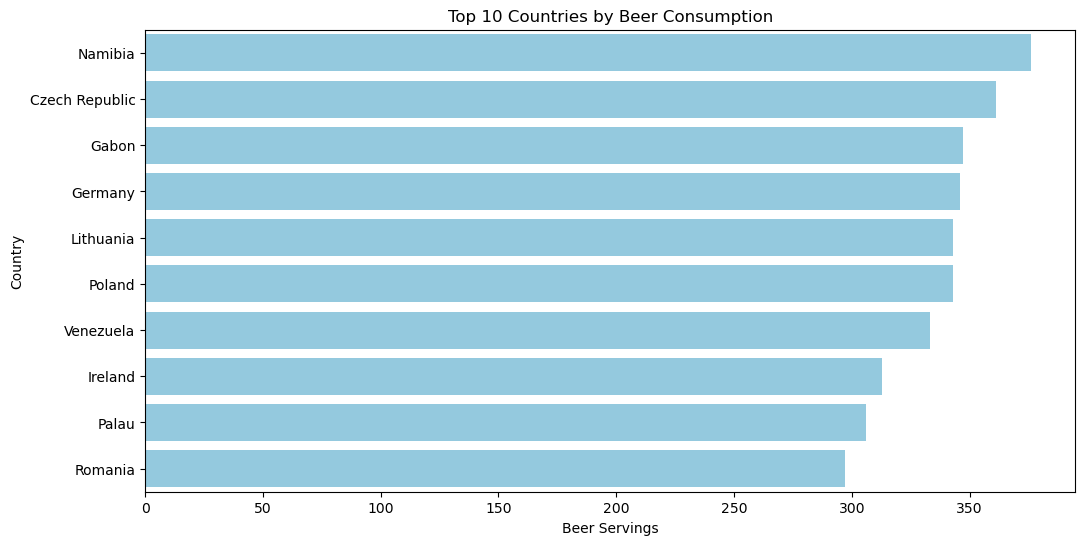

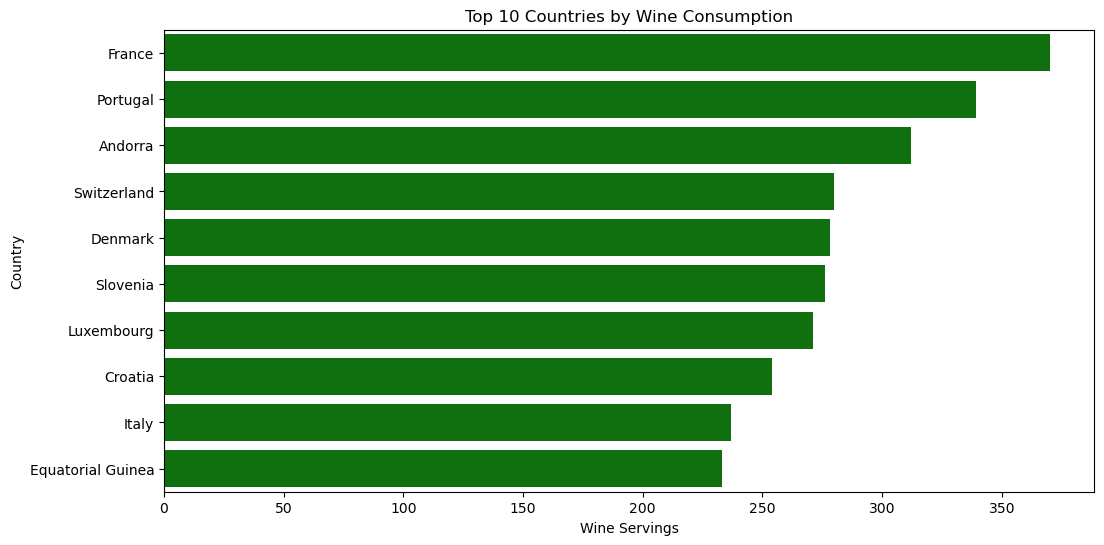

In [128]:
# Визуализация топовых стран по пиву
plt.figure(figsize=(12, 6))
sns.barplot(x='beer_servings', y='country', data=top_beer, color='skyblue')
plt.title('Top 10 Countries by Beer Consumption')
plt.xlabel('Beer Servings')
plt.ylabel('Country')
plt.show()

# Визуализация топовых стран по вину
plt.figure(figsize=(12, 6))
sns.barplot(x='wine_servings', y='country', data=top_wine, color='green')
plt.title('Top 10 Countries by Wine Consumption')
plt.xlabel('Wine Servings')
plt.ylabel('Country')
plt.show()

<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [12]:
df_t = pd.read_csv('tarantino.csv')
df_t

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


In [20]:
df_t.describe(include='all')

,movie,type,word,minutes_in
count,1894,1894,1704,1894.000000
unique,7,2,60,NaN
top,Pulp Fiction,word,fucking,NaN
freq,476,1704,407,NaN
mean,NaN,NaN,NaN,71.529071
std,NaN,NaN,NaN,45.075036
min,NaN,NaN,NaN,0.400000
25%,NaN,NaN,NaN,29.655000
50%,NaN,NaN,NaN,70.525000
75%,NaN,NaN,NaN,112.835000


In [22]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [24]:
df_t['type'].value_counts()

type
word     1704
death     190
Name: count, dtype: int64

In [26]:
df_t['word'].value_counts()

word
fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
bullshit          15
motherfuckers     15
dick              14
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitting           1
shitless           1
bastards

In [44]:
# Число проклятий, летальных исходов и их соотношение по фильмам
curse_death_by_movie = df_t.groupby(['movie', 'type']).size().unstack(fill_value=0)

curse_death_by_movie['total'] = curse_death_by_movie.sum(axis=1)
curse_death_by_movie['curse_to_death_ratio'] = round(curse_death_by_movie['word'] / curse_death_by_movie['death'],2).replace(0, float('nan'))

curse_death_by_movie

type,death,word,total,curse_to_death_ratio
movie,,,,
Django Unchained,47,262,309,5.57
Inglorious Basterds,48,58,106,1.21
Jackie Brown,4,368,372,92.00
Kill Bill: Vol. 1,63,57,120,0.90
Kill Bill: Vol. 2,11,69,80,6.27
Pulp Fiction,7,469,476,67.00
Reservoir Dogs,10,421,431,42.10


<Axes: title={'center': 'Число проклятий и летальных исходов по фильмам'}, xlabel='movie'>

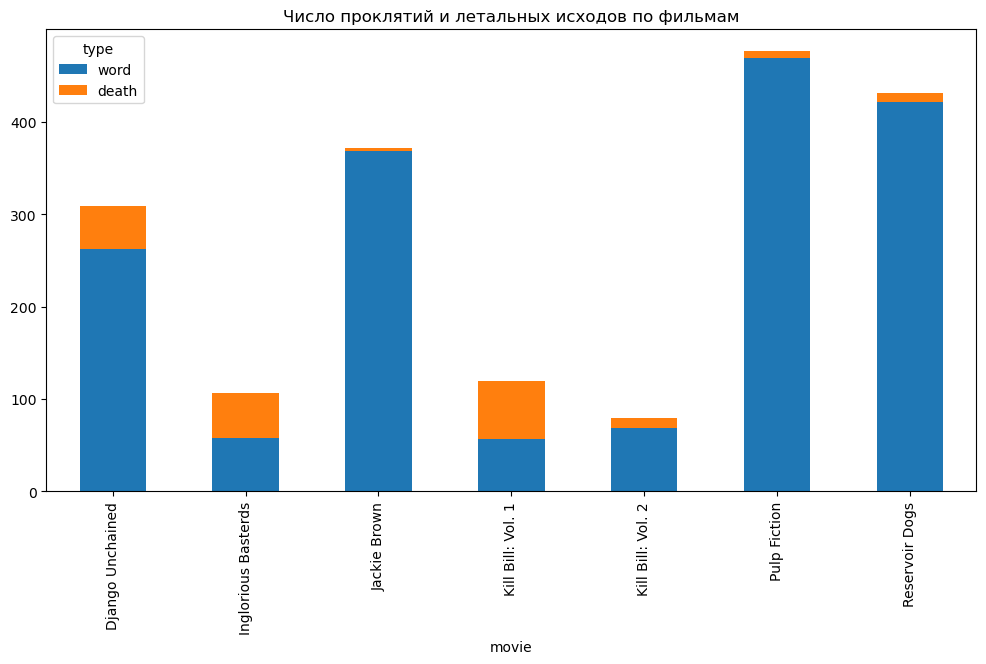

In [48]:
curse_death_by_movie[['word', 'death']].plot(kind='bar', stacked=True, figsize=(12, 6), title='Число проклятий и летальных исходов по фильмам')

In [54]:
# Проклятья по фильмам
curse_words_by_movie = df_t[df_t['type'] == 'word'].groupby(['movie', 'word']).size().unstack(fill_value=0)

curse_words_by_movie

word,ass,asses,asshead,asshole,assholes,bastard,bastards,bitch,bitches,bullshit,...,shithead,shitless,shitload,shittiest,shitting,shitty,slope,slut,squaw,wetback
movie,,,,,,,,,,,,,,,,,,,,,
Django Unchained,28,0,0,0,0,1,0,10,5,0,...,0,0,0,0,0,0,0,0,0,0
Inglorious Basterds,6,0,0,0,0,0,0,1,1,0,...,2,0,0,0,1,0,0,1,1,0
Jackie Brown,52,0,0,0,0,0,0,13,1,3,...,0,0,2,1,0,2,0,0,0,0
Kill Bill: Vol. 1,3,0,0,0,0,2,0,7,1,1,...,1,0,0,0,0,0,0,0,0,0
Kill Bill: Vol. 2,7,0,0,1,1,2,1,6,0,1,...,0,1,0,0,0,1,0,0,0,0
Pulp Fiction,31,3,0,3,1,0,0,15,0,1,...,0,0,0,0,0,0,1,0,0,1
Reservoir Dogs,13,1,1,6,3,5,0,12,1,9,...,0,0,0,0,0,1,0,0,0,1


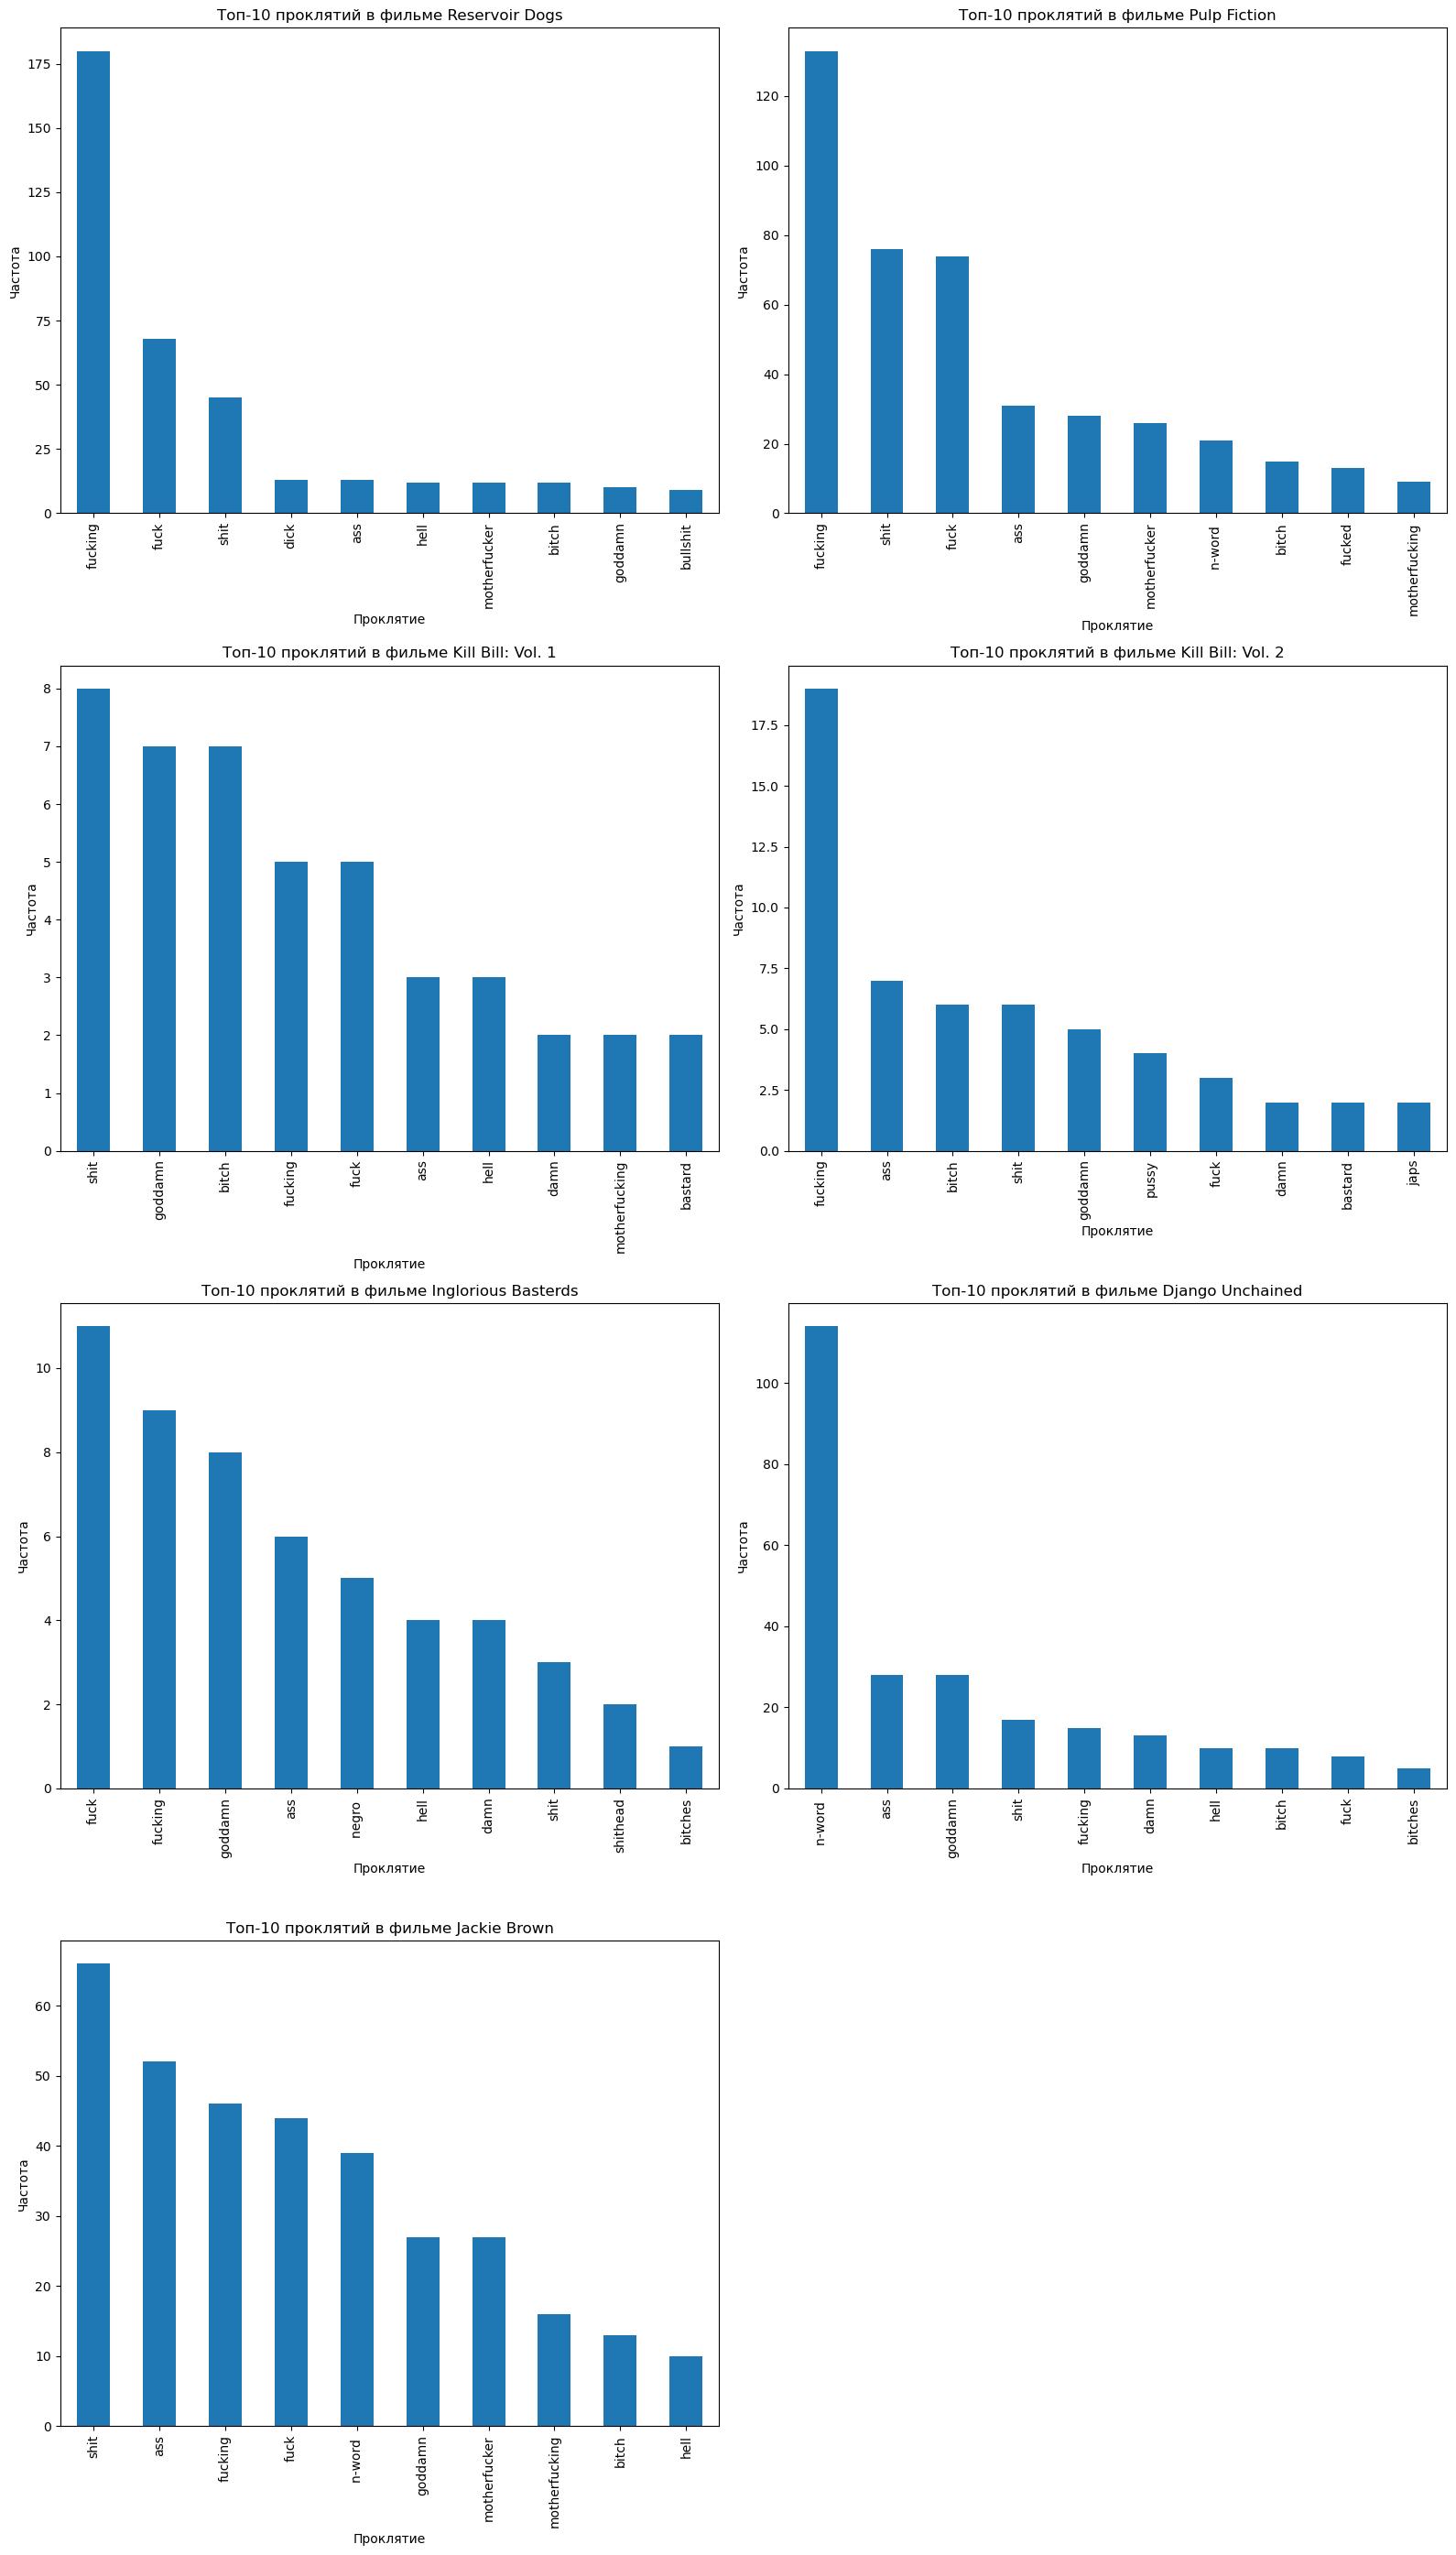

In [82]:
movies = df_t['movie'].unique()
num_movies = len(movies)

fig, axes = plt.subplots(nrows=(num_movies + 1) // 2, ncols=2, figsize=(16, num_movies * 4))
axes = axes.flatten()


for i, MovieName in enumerate(movies):
    top_curses = curse_words_by_movie.loc[MovieName].sort_values(ascending=False).head(10)
    top_curses.plot(kind='bar', ax=axes[i], title=f'Топ-10 проклятий в фильме {MovieName}')
    axes[i].set_ylabel('Частота')
    axes[i].set_xlabel('Проклятие')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [92]:
#Распределение времени между проклятиями по фильмам
curse_times = df_t[df_t['type'] == 'word'].sort_values(by=['movie', 'minutes_in'])
curse_times['time_diff'] = curse_times.groupby('movie')['minutes_in'].diff()

time_diff_by_movie = curse_times.groupby('movie')['time_diff'].apply(lambda x: x.describe())
time_diff_by_movie

movie                     
Django Unchained     count    261.000000
                     mean       0.586398
                     std        1.072245
                     min        0.000000
                     25%        0.050000
                     50%        0.160000
                     75%        0.530000
                     max        6.650000
Inglorious Basterds  count     57.000000
                     mean       2.219825
                     std        3.413591
                     min        0.000000
                     25%        0.090000
                     50%        0.510000
                     75%        2.850000
                     max       13.100000
Jackie Brown         count    367.000000
                     mean       0.377629
                     std        0.730812
                     min        0.000000
                     25%        0.040000
                     50%        0.100000
                     75%        0.320000
                     max      

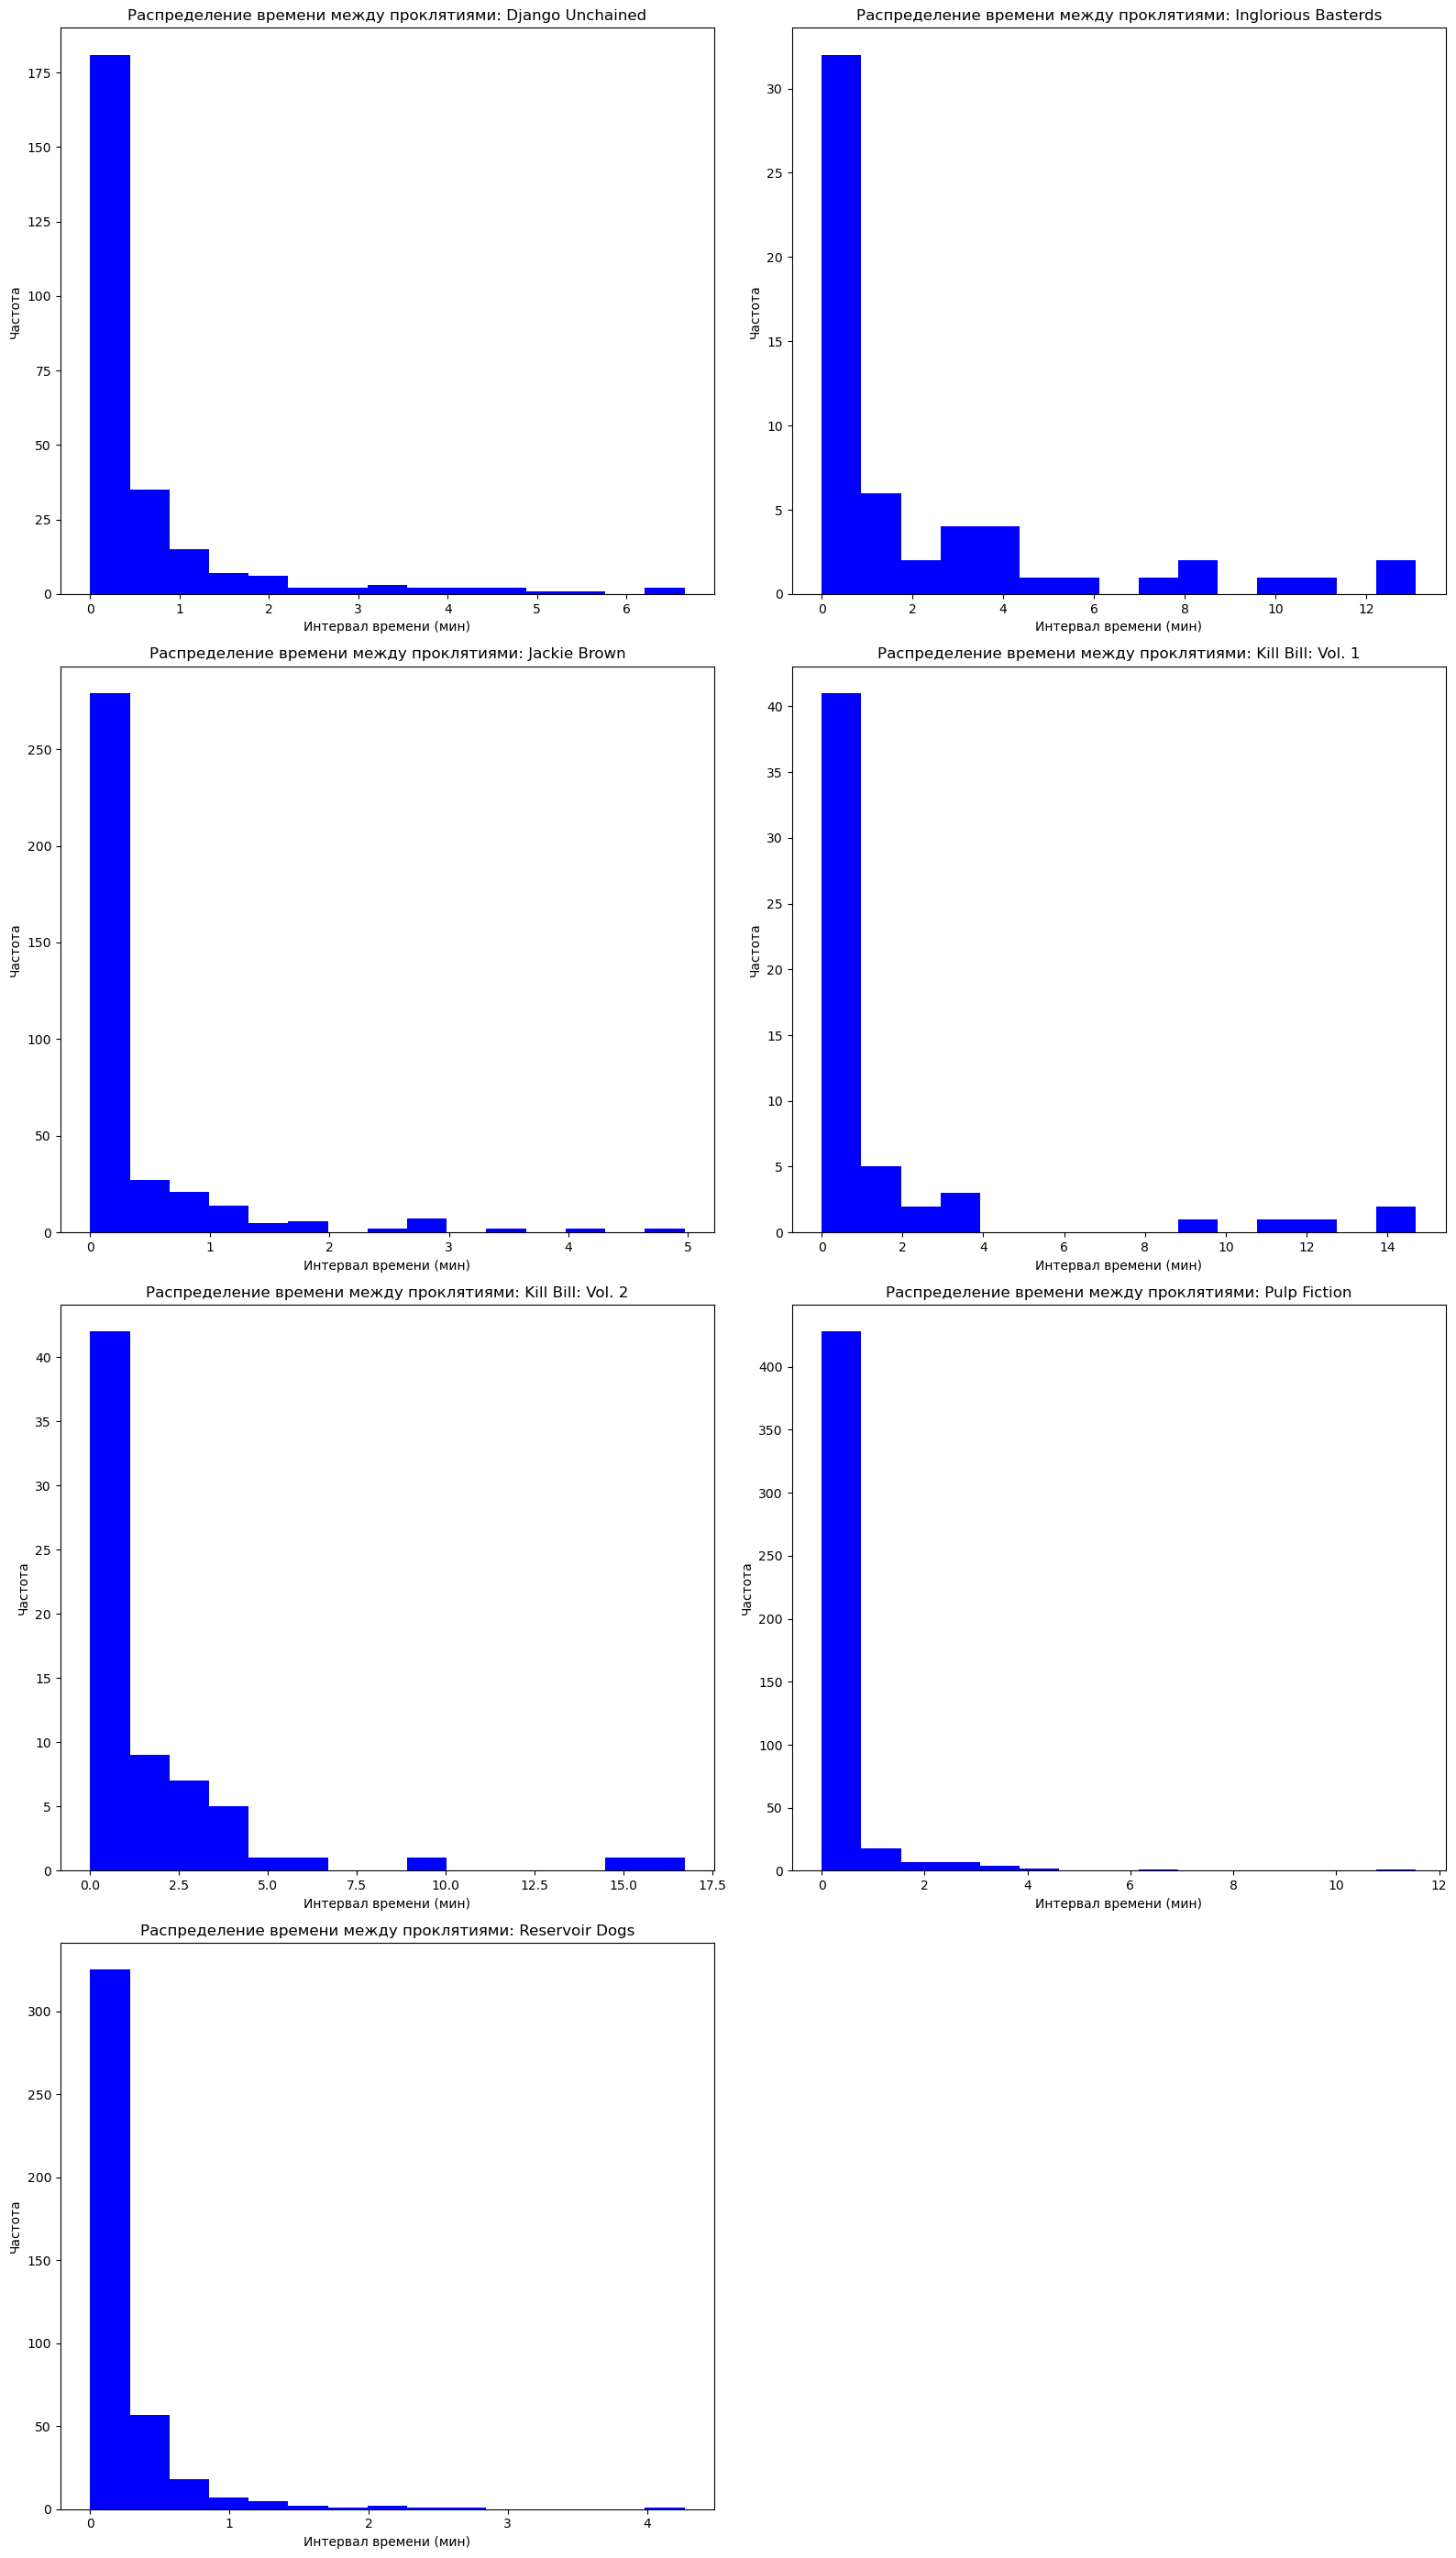

In [102]:
fig, axes = plt.subplots(nrows=(num_movies + 1) // 2, ncols=2, figsize=(16, num_movies * 4))
axes = axes.flatten()

for i, MovieName in enumerate(movies):
    time_diffs = curse_times[curse_times['movie'] == MovieName]['time_diff'].dropna()
    if not time_diffs.empty:  # Если есть данные для фильма
        time_diffs.plot(
            kind='hist', bins=15, ax=axes[i], color='blue',
            title=f'Распределение времени между проклятиями: {MovieName}'
        )
        axes[i].set_xlabel('Интервал времени (мин)')
        axes[i].set_ylabel('Частота')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()